<a href="https://colab.research.google.com/github/alexandramendoza/Final-Project-Bioinformatics/blob/main/notebooks/Bioinformatics_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load ASV table and metadata table

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving SparseDOSSA_sample_metadata.tsv to SparseDOSSA_sample_metadata.tsv
Saving SparseDOSSA_ASV_table.tsv to SparseDOSSA_ASV_table.tsv


In [ ]:
import pandas as pd

asv = pd.read_csv("SparseDOSSA_ASV_table.tsv", sep="\t", index_col=0)
meta = pd.read_csv("SparseDOSSA_sample_metadata.tsv", sep="\t")

asv.shape, meta.shape

((200, 80), (80, 4))

# Split ASV table into Gut and Oral

In [ ]:
gut_samples = meta.loc[meta['site']== "gut", "sample_id"].tolist()
oral_samples = meta.loc[meta['site']== "oral", "sample_id"].tolist()

len(gut_samples), len(oral_samples)

(40, 40)

In [ ]:
asv_gut = asv[gut_samples]
asv_oral = asv[oral_samples]

asv_gut.shape, asv_oral.shape

((200, 40), (200, 40))

# Set X and y

For combined Oral and Gut asv data

In [ ]:
X = asv.T.copy()
y = meta['gender'].values

X.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature191,Feature192,Feature193,Feature194,Feature195,Feature196,Feature197,Feature198,Feature199,Feature200
Sample1,0,0,0,0,11,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
Sample2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,50,0,0,0
Sample3,17,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample4,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample5,0,0,0,0,0,0,0,0,0,0,...,0,34,0,0,0,0,18,0,0,2


For Gut asv data only

In [ ]:
X_gut = asv_gut.T.copy()

y_gut = meta.set_index('sample_id').loc[gut_samples, 'gender'].values

X_gut.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature191,Feature192,Feature193,Feature194,Feature195,Feature196,Feature197,Feature198,Feature199,Feature200
Sample1,0,0,0,0,11,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
Sample3,17,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample5,0,0,0,0,0,0,0,0,0,0,...,0,34,0,0,0,0,18,0,0,2
Sample7,4,0,0,0,0,0,0,0,0,0,...,0,0,6,130,0,0,10,0,0,0
Sample9,959,0,0,0,0,0,0,0,0,0,...,0,5,0,46,0,0,10,0,0,6


For Oral asv data only

In [ ]:
X_oral = asv_oral.T.copy()

y_oral = meta.set_index('sample_id').loc[oral_samples, 'gender'].values

X_oral.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature191,Feature192,Feature193,Feature194,Feature195,Feature196,Feature197,Feature198,Feature199,Feature200
Sample2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,50,0,0,0
Sample4,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample6,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sample8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,3,0,0,1
Sample10,0,0,0,0,0,0,0,48,0,0,...,0,0,0,0,0,0,5,0,0,0


# Train/test split

For combined Oral and Gut model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X , y , test_size = 0.2, random_state= 42, stratify = y
)

X_train.shape, X_test.shape

((64, 200), (16, 200))

For Gut only model

In [ ]:
X_train_gut, X_test_gut, y_train_gut, y_test_gut = train_test_split(
    X_gut , y_gut , test_size = 0.2, random_state = 42, stratify = y_gut
)

X_train_gut.shape, X_test_gut.shape

((32, 200), (8, 200))

For Oral only model

In [ ]:
X_train_oral, X_test_oral, y_train_oral, y_test_oral = train_test_split(
    X_oral , y_oral , test_size = 0.2, random_state = 42, stratify = y_oral
)

X_train_oral.shape, X_test_oral.shape

((32, 200), (8, 200))

# Train Rain Forest model

For combined Gut and Oral model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

For Gut only model

In [ ]:
rf_gut = RandomForestClassifier( n_estimators=300, random_state=42, n_jobs=-1)

rf_gut.fit(X_train_gut, y_train_gut)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

For Oral only model

In [ ]:
rf_oral = RandomForestClassifier( n_estimators=300, random_state=42, n_jobs=-1)

rf_oral.fit(X_train_oral, y_train_oral)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

#Test models and get accuracies

For combined Gut and Oral model

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 1.0


For Gut only model

In [ ]:
pred_gut = rf_gut.predict(X_test_gut)

acc_gut = accuracy_score(y_test_gut, pred_gut)
print(f"Accuracy: {acc_gut}")

Accuracy: 1.0


For Oral only model

In [ ]:
pred_oral = rf_oral.predict(X_test_oral)

acc_oral = accuracy_score(y_test_oral, pred_oral)
print(f"Accuracy: {acc_oral}")


Accuracy: 0.875


# Create Figures

Accuracies Tables

In [17]:
import pandas as pd
accuracies = {
    'Model': ['Combined Gut and Oral', 'Gut Only', 'Oral Only'],
    'Accuracy': [acc, acc_gut, acc_oral]
}

accuracy_table = pd.DataFrame(accuracies)

display(accuracy_table)

,Model,Accuracy
0,Combined Gut and Oral,1.000
1,Gut Only,1.000
2,Oral Only,0.875


Confusion Matrix

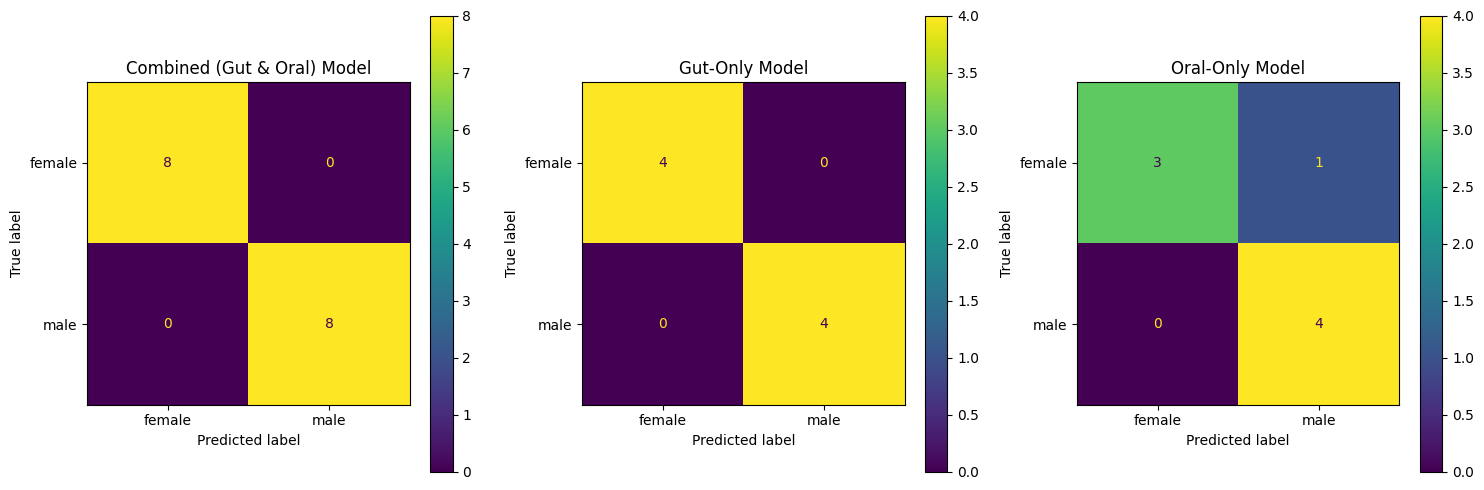

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm_gut = confusion_matrix(y_test_gut, pred_gut)
cm_oral = confusion_matrix(y_test_oral, pred_oral)

class_names = ['female', 'male']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Combined model
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot(ax=axes[0])
axes[0].set_title('Combined (Gut & Oral) Model')

# Gut onlt model
ConfusionMatrixDisplay(confusion_matrix=cm_gut, display_labels=class_names).plot(ax=axes[1])
axes[1].set_title('Gut-Only Model')

# Oral only model
ConfusionMatrixDisplay(confusion_matrix=cm_oral, display_labels=class_names).plot(ax=axes[2])
axes[2].set_title('Oral-Only Model')

plt.tight_layout()
plt.show()